In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
%matplotlib inline


 


In [2]:
df = pd.read_csv('/Users/kai/Desktop/games.csv')

In [209]:
def preprocessing(df):
    df.columns = df.columns.str.lower()
    df = df.dropna(subset=['name','year_of_release'])
    df['critic_score'] = pd.to_numeric(df['critic_score'])
    df['user_score'] = pd.to_numeric(df['user_score'], errors ='coerce')
    df['year_of_release'] = df['year_of_release'].astype(int)
    df['critic_score'].hist(by=df['platform'],figsize=(15,14))
    plt.show()
    df['critic_score'] = df.groupby(['platform'], 
                                    sort=False)['critic_score'].apply(lambda x: x.fillna(x.median()))
    df['user_score'].hist(by=df['platform'],figsize=(15,14))
    plt.show()
    df['user_score'] = df.groupby(['platform'], 
                                  sort=False)['user_score'].apply(lambda x: x.fillna(x.median()))
    df['rating'] = df['rating'].fillna('NA')
    df=df.dropna()
    df = df.drop_duplicates(keep='last')
    df['total_sales'] = df.iloc[:,4:8].sum(axis=1)
    
    return df
    
    

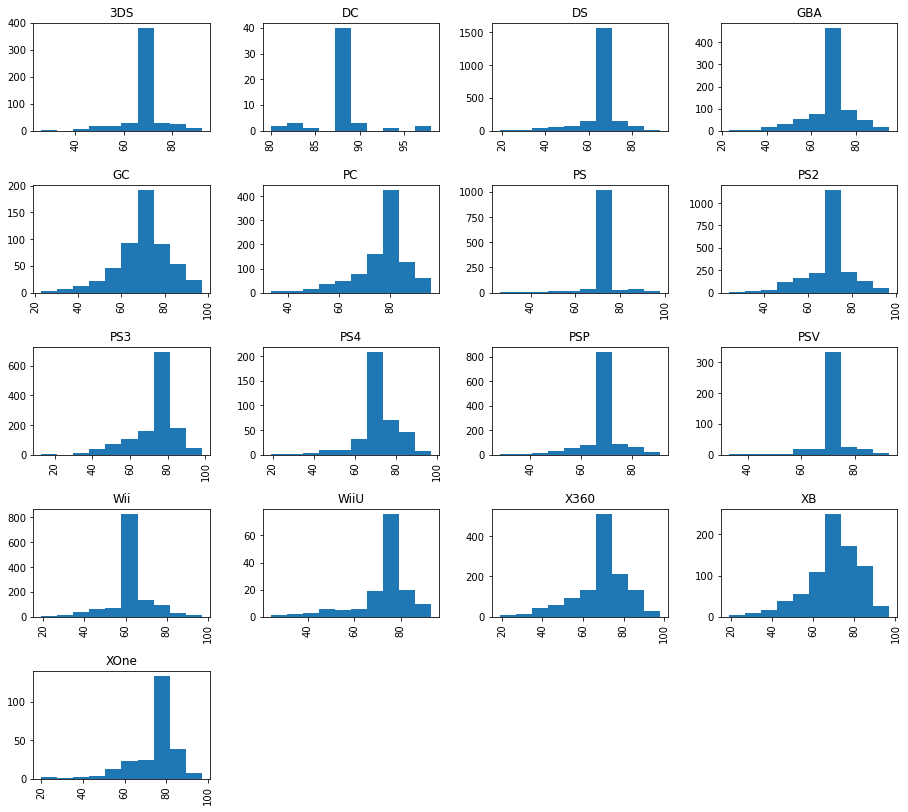

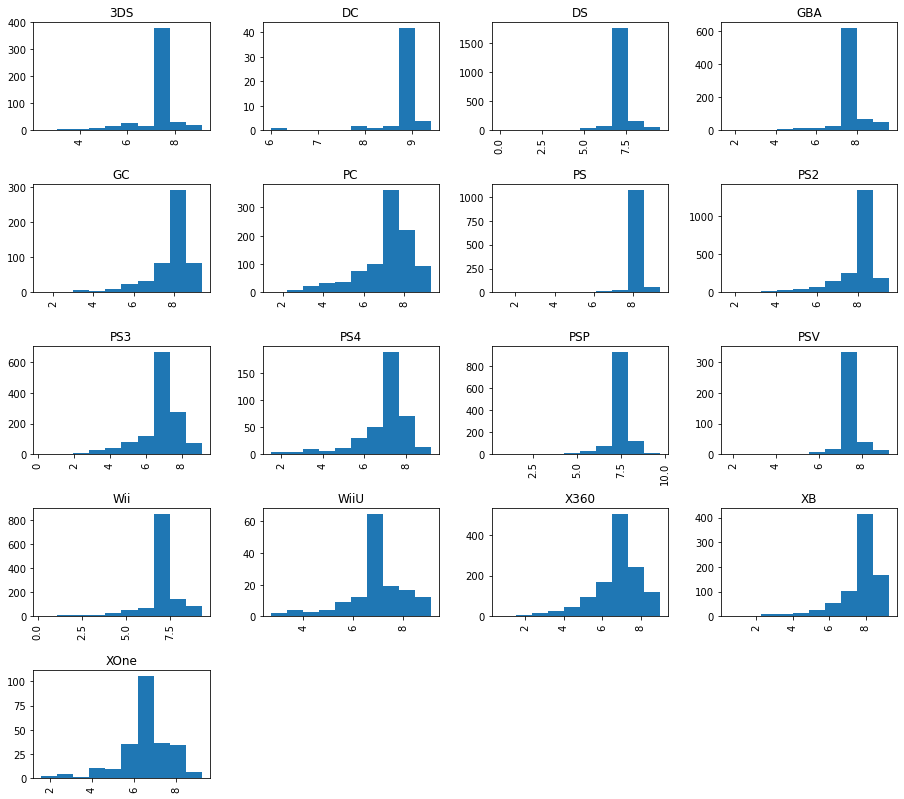

In [210]:
df = preprocessing(df)

### Первые 17 гистограмм имеют значение "critic_score" для каждой платформы. Это делается для проверки асимметрии в данных, чтобы мы могли решить, что будет лучше для измерения центральной тенденции.

### Вторые 17 гистограмм имеют значение "user_score" для каждой платформы.



In [206]:
df['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS', 'PS', 'XB',
       'PC', 'PSP', 'XOne', 'WiiU', 'GC', 'DC', 'PSV'], dtype=object)

## Выше я преобразовал столбец "year_of_release" в "int", так как год не может быть в "float". Я преобразовал "user_score" в "numeric_" с "error_" = "coerce_", потому что он содержит значение "tbd" и недопустим для синтаксического анализа и поэтому будет установлен как NaN. После просмотра значений "Null_" они составили около 40% в "critic_score", "user_score" и "_rating". После просмотра я обнаружил, что данные в "user_score" и "critic_score" были искажены, поэтому я попытался сгруппировать по "platform_" и "name_" и заполнить по медиане. Но это не помогло, поэтому я сгруппировал по "платформе" и заполнил по медиане.  Я заполняю значения "_Null" в "_rating" с помощью "NA". После этого наши значения "_Null" составляли менее 10% данных, поэтому я удалил строки, содержащие значения "_Null". Я создал столбец "total_sales", куда добавил продажи из всех регионов. Я также преобразовал "_column_name" в нижний регистр, как было предложено, и с ним также легко работать. Я также удалил "_duplicate rows", сохранив последнюю строку на случай, если она есть.

In [211]:
def number_of_games_per_year(df):
    plt.figure(figsize=(15,7))
    sns.countplot(x=df.year_of_release)
    plt.show()
    print(df.year_of_release.value_counts())
    

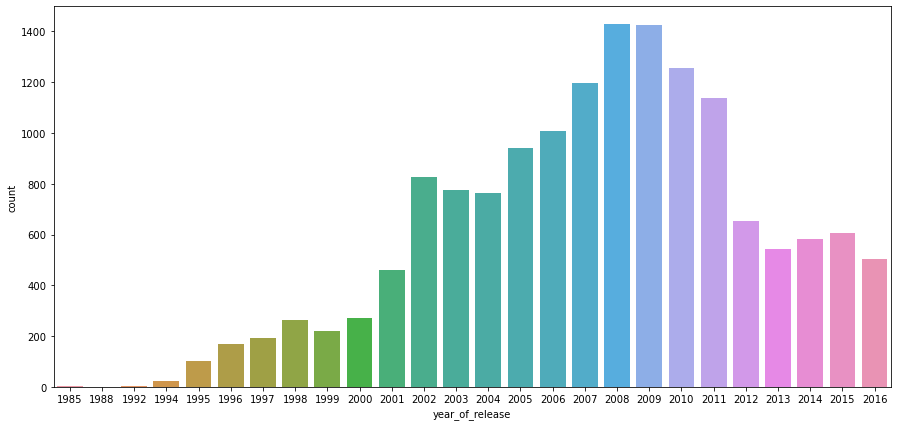

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     828
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     461
2000     271
1998     263
1999     221
1997     194
1996     168
1995     101
1994      23
1992       5
1985       2
1988       1
Name: year_of_release, dtype: int64


In [212]:
number_of_games_per_year(df)

### Можно отобразить подсчеты в "_countplot", также используя "twinx" или другие способы построения графика. 

### Резкий скачок в количестве игр, выпускаемых в год, произошел в 2002 году. Пик - 2008-2009 годы. После этого началась рецессия. Конкуренция на рынке также возросла с тех пор, как на рынок вышло много новых игровых компаний, данных о которых у нас нет в этом файле. Кроме того, на рынке появилось много других развлечений, это может вызвать рецессию.

### Одной из причин увеличения также является развитие вычислительных мощностей. Рост произошел также по мере того, как персональные компьютеры стали более доступными. Таким образом, увеличение продаж персональных компьютеров также привело к росту игровой индустрии.



In [213]:
total_sales_pf = pd.pivot_table(df, index=['platform'], values='total_sales', aggfunc='sum')
total_sales_pf =total_sales_pf.sort_values(by='total_sales',ascending=False)
total_sales_pf


,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [214]:
top_pf =list(total_sales_pf.index[:6])  #Топ-6 Платформ
top_pf

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

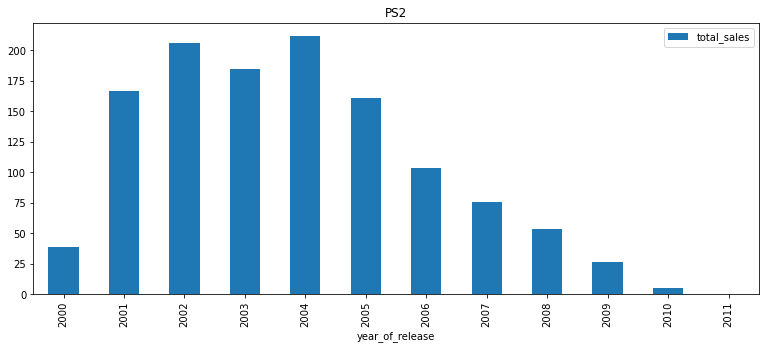

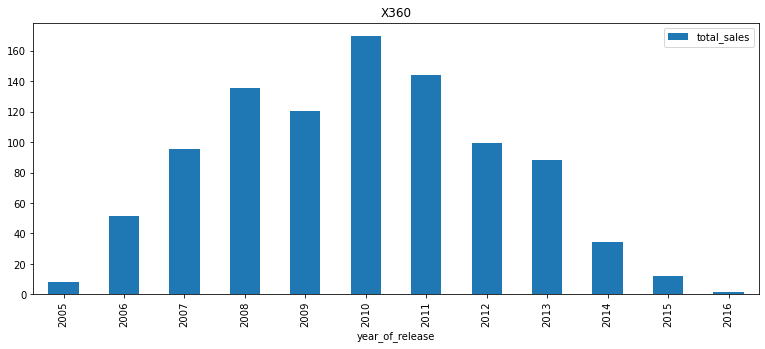

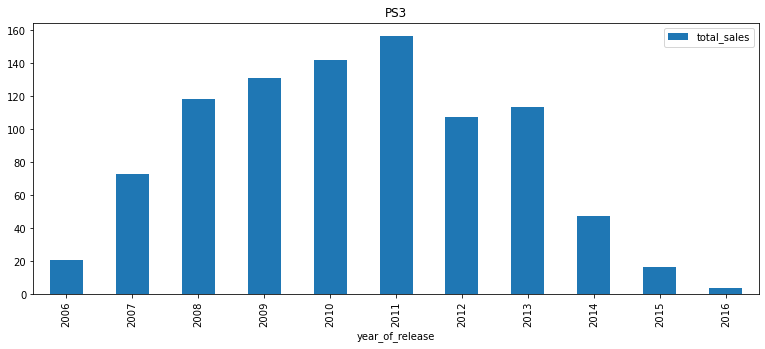

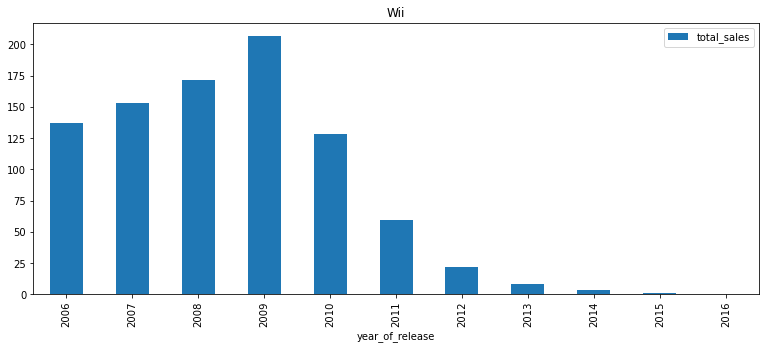

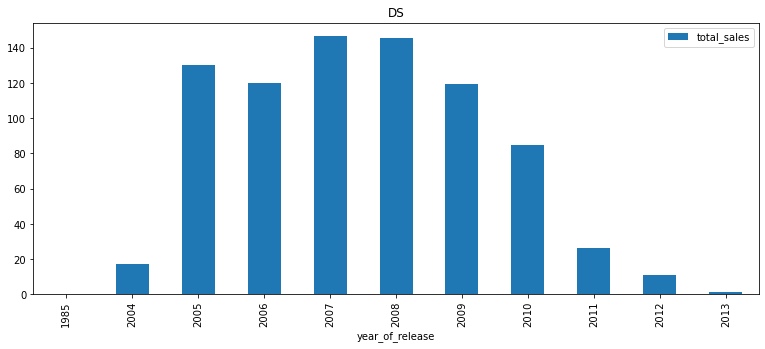

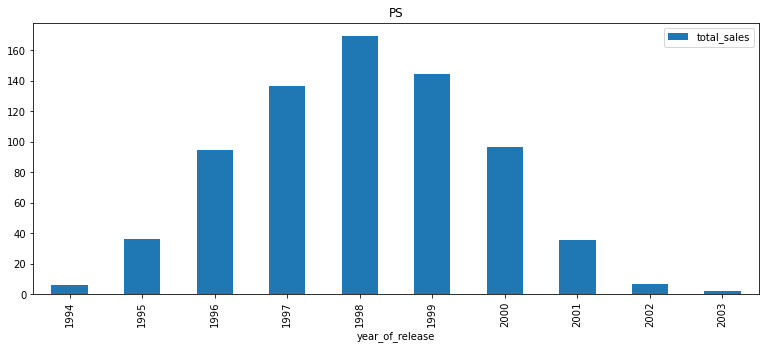

In [215]:
for i in top_pf:
    df[df['platform'] == i].pivot_table(index='year_of_release', values='total_sales',
                                               aggfunc='sum').plot(kind='bar', figsize=(13,5))
    plt.title(i)


### Срок использования в среднем 8-10 лет.

### Я считаю, что текущий период продаж приходится на период с 2013 по 2016 год.

### Давайте посмотрим, сколько консолей "живут".

### PS - с 1994 по 2003 год, почти 10 лет;

### PS2 - с 2000 по 2011 год - 11 лет;

### PS3 - с 2006 года по настоящее время, но PS4 и PS5 совершили падение на рынке PS3. Теперь Sony объявила, что прекратит производство PS3.

### Точно так же на основе других я определил жизненный цикл между 8-10 годами.

In [216]:
current_df = df.loc[df['year_of_release']>=2013] 

In [217]:
current_df.shape

(2233, 12)

In [218]:
current_top_pf = pd.pivot_table(current_df, index=['platform','year_of_release'], 
                                     values='total_sales', aggfunc = 'sum')
current_top_pf

total_sales
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

In [219]:
top_pf_sales = pd.pivot_table(current_df, index=['platform'], 
                                     values='total_sales', aggfunc = 'sum')
top_pf_sales =top_pf_sales.sort_values(by='total_sales',ascending=False)
top_pf_sales

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


### Top Platforms : PS4, PS3, Xone,3DS,X360
### PS4 - Рост
### PS3 - падающий
### Xone -  Рост
### 3DS - падающий
### X360 - падающий

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: total_sales, dtype: float64

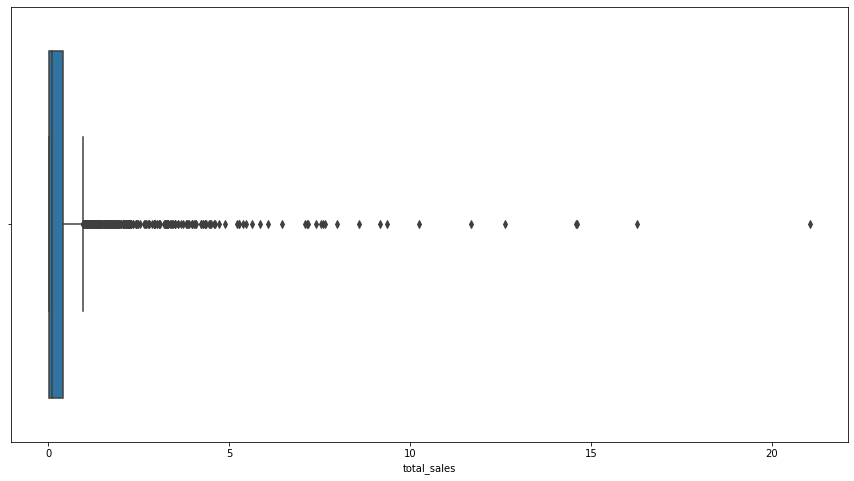

In [220]:
plt.figure(figsize=(15,8))
sns.boxplot(x=current_df['total_sales'])
current_df['total_sales'].describe()


Text(0, 0.5, 'total_sales')

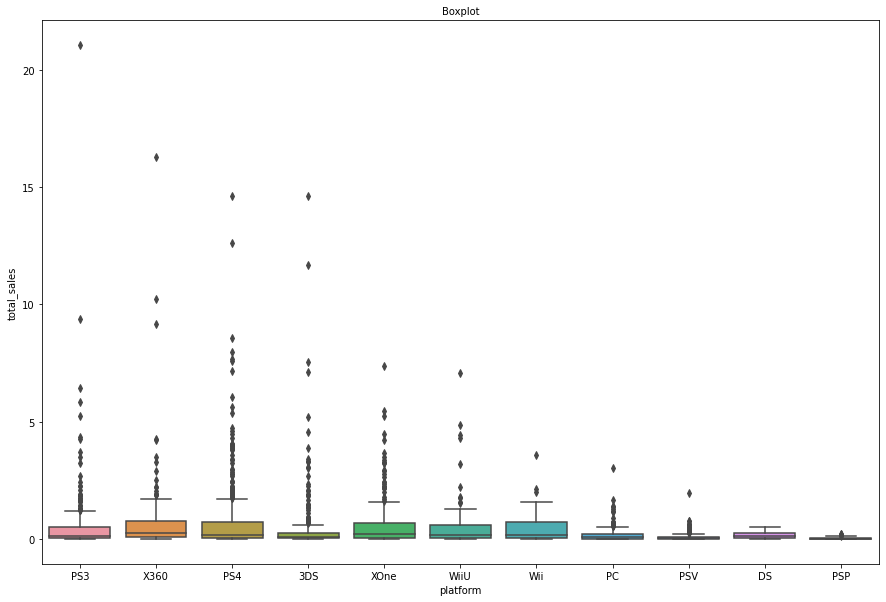

In [221]:
plt.figure(figsize=(15,10))
sns.boxplot(data=current_df, x='platform', y='total_sales')
plt.title('Boxplot', fontsize=10)
plt.xlabel('platform', fontsize=10)
plt.ylabel('total_sales',fontsize=10)

In [222]:
current_df[['platform','total_sales']].loc[current_df['platform']=='PS4'].describe()
    

,total_sales
count,392.000000
mean,0.801378
std,1.609456
min,0.010000
25%,0.060000
50%,0.200000
75%,0.730000
max,14.630000


In [223]:
current_df[['platform','total_sales']].loc[current_df['platform']=='PS3'].describe()


,total_sales
count,345.000000
mean,0.525884
std,1.451939
min,0.010000
25%,0.040000
50%,0.150000
75%,0.510000
max,21.050000


In [224]:
current_df[['platform','total_sales']].loc[current_df['platform']=='XOne'].describe()


,total_sales
count,247.000000
mean,0.645020
std,1.036139
min,0.010000
25%,0.060000
50%,0.220000
75%,0.685000
max,7.390000


In [225]:
current_df[['platform','total_sales']].loc[current_df['platform']=='3DS'].describe()


,total_sales
count,303.000000
mean,0.472772
std,1.381347
min,0.010000
25%,0.040000
50%,0.090000
75%,0.280000
max,14.600000


In [226]:
current_df[['platform','total_sales']].loc[current_df['platform']=='X360'].describe()


,total_sales
count,186.000000
mean,0.735484
std,1.663275
min,0.010000
25%,0.080000
50%,0.265000
75%,0.795000
max,16.270000


### Разница в продажах совсем иная. Есть очень популярные игры, которые продаются годами и приносят большую прибыль, их всего несколько. И есть много игр, которые не смогли преодолеть порог в 400 тысяч долларов за выбранный период.
### Средняя выручка на игру по миру: 488 тыс. Самый высокий 21 млн.
### Средняя выручка на игру по платформе PS4: 801 тыс. Самый высокий14,6 млн.
### Средняя выручка на игру по платформе PS3: 526 тыс. Самый высокий 21 млн.
### Средняя выручка на игру по платформе XOne: 645 тыс.  Самый высокий 7,4 млн.
### Средняя выручка на игру по платформе X360: 735 тыс. Самый высокий 16,3 млн.
### Средняя выручка на игру по платформе 3DS: 472 тыс. Самый высокий 14,6 млн.

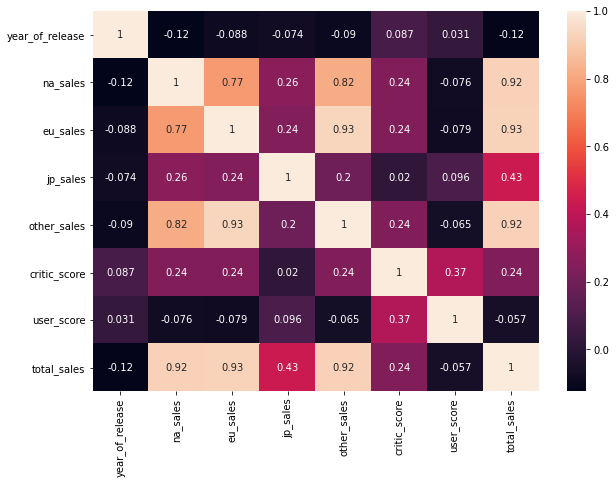

In [227]:
plt.figure(figsize=(10,7))
sns.heatmap(current_df.corr(),annot=True)
plt.show()

In [228]:
PS4_current_df = current_df.loc[current_df['platform']=='PS4']
XOne_current_df = current_df.loc[current_df['platform']=='XOne']

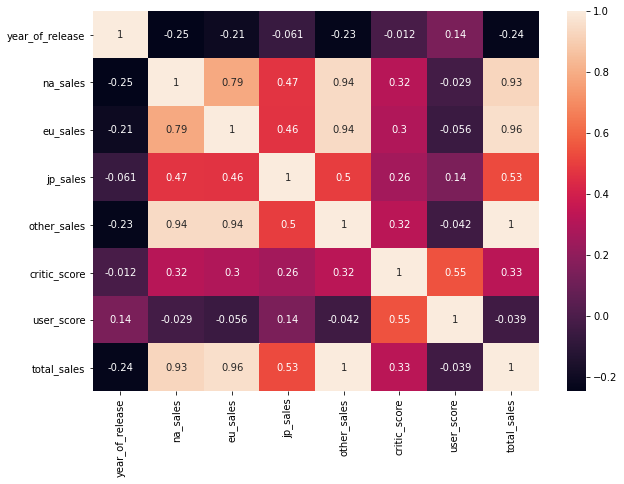

In [229]:
plt.figure(figsize=(10,7))
sns.heatmap(PS4_current_df.corr(),annot=True)
plt.show()

### Идеально: Если значение близко к ± 1, то говорят, что это идеальная корреляция: по мере увеличения одной переменной другая переменная также имеет тенденцию увеличиваться (если положительная) или уменьшаться (если отрицательная).

### Высокая степень: Если значение коэффициента находится в диапазоне от ±0,50 до ±1, то говорят, что это сильная корреляция.

### Умеренная степень: Если значение находится в диапазоне от ±0,30 до ±0,49, то говорят, что это средняя корреляция.

### Степень юриспруденции: когда значение ниже + .29, то говорят, что это небольшая корреляция.

### Отсутствие корреляции: Когда значение равно нулю.

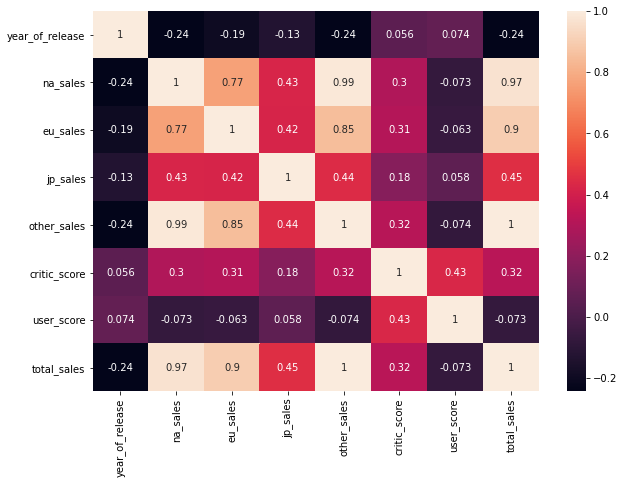

In [230]:
plt.figure(figsize=(10,7))
sns.heatmap(XOne_current_df.corr(),annot=True)
plt.show()

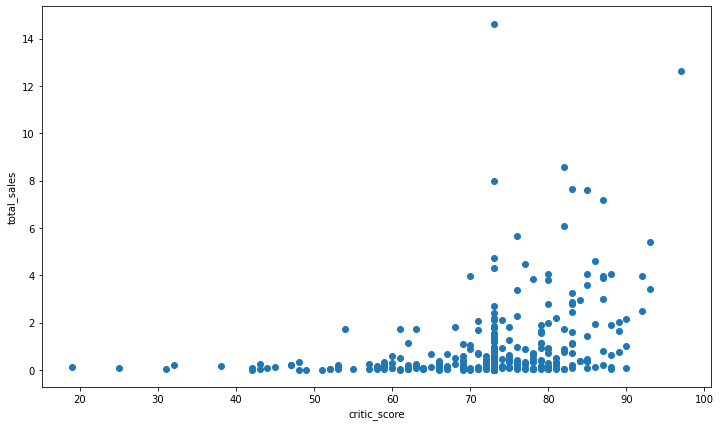

In [231]:
plt.figure(figsize=(12,7))
plt.scatter(PS4_current_df['critic_score'],PS4_current_df['total_sales'])
plt.xlabel('critic_score')
plt.ylabel('total_sales')
plt.show() 

### С увеличением среднего рейтинга "critic_score" средний уровень дохода от продажи игр также увеличивается. Это интуитивно понятно, так как люди часто проверяют "critic_score", и это влияет на их решение, аналогично рейтингу фильмов "IMDB".

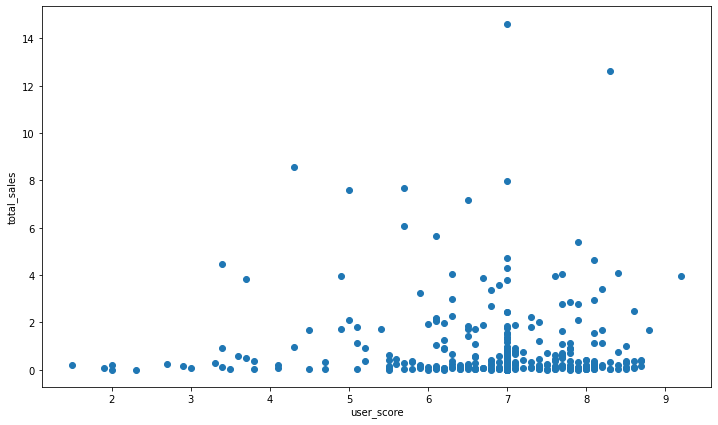

In [233]:
plt.figure(figsize=(12,7))
plt.scatter(PS4_current_df['user_score'],PS4_current_df['total_sales'])
plt.xlabel('user_score')
plt.ylabel('total_sales')
plt.show()

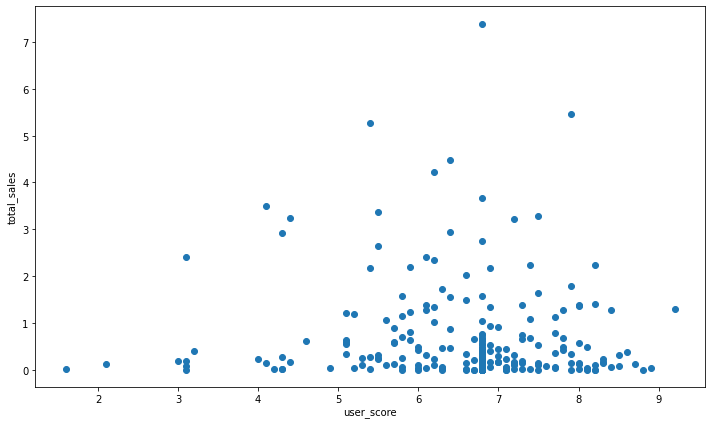

In [114]:
plt.figure(figsize=(12,7))
plt.scatter(XOne_current_df['user_score'],XOne_current_df['total_sales'])
plt.xlabel('user_score')
plt.ylabel('total_sales')
plt.show()

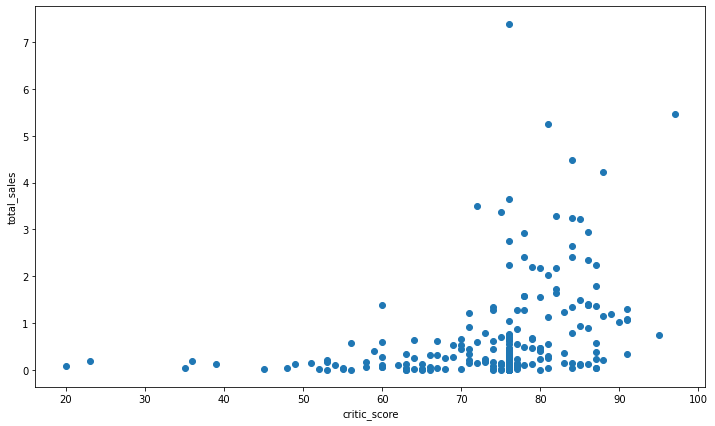

In [115]:
plt.figure(figsize=(12,7))
plt.scatter(XOne_current_df['critic_score'],XOne_current_df['total_sales'])
plt.xlabel('critic_score')
plt.ylabel('total_sales')
plt.show()

### Мы обнаружили аналогичную связь в "_scatter plots" в данных XOne.

In [234]:
current_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.0,NA,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,68.0,7.1,NA,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [235]:
sales_by_genre = pd.pivot_table(current_df, index=['genre'], 
                                     values='total_sales', aggfunc = 'sum')
sales_by_genre =sales_by_genre.sort_values(by='total_sales',ascending=False)
sales_by_genre

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


### Самый Прибыльный жанр: "Action","Shooter"

### Наименее Прибыльный жанр : "Puzzle","Strategy"

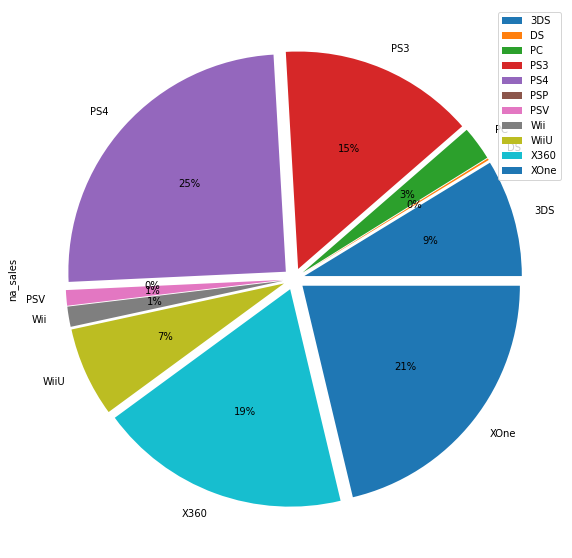

In [236]:
explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
current_df.groupby(['platform']).sum().plot(kind='pie', y='na_sales', autopct='%1.0f%%',
                                            figsize=(20,10),explode=explode)
plt.show()

### Топ-5 платформ и доля "na_sales" :
### 1. PS4 - 25 % 
### 2. XOne - 21%
### 3. X360 - 19 %
### 4. PS3 - 15 %
### 5. 3DS - 9 %
                                    

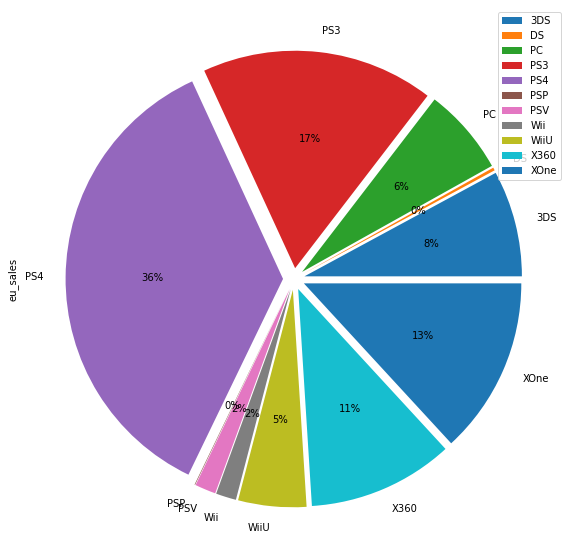

In [237]:
current_df.groupby(['platform']).sum().plot(kind='pie', y='eu_sales', autopct='%1.0f%%',
                                            figsize=(20,10),explode=explode)
plt.show()

### Топ-5 платформ и доля "eu_sales" : 
### 1. PS4 - 36 % 
### 2. PS3 - 17 %
### 3. XOne - 13 %
### 4. X360 - 11 %
### 5. 3DS - 8%

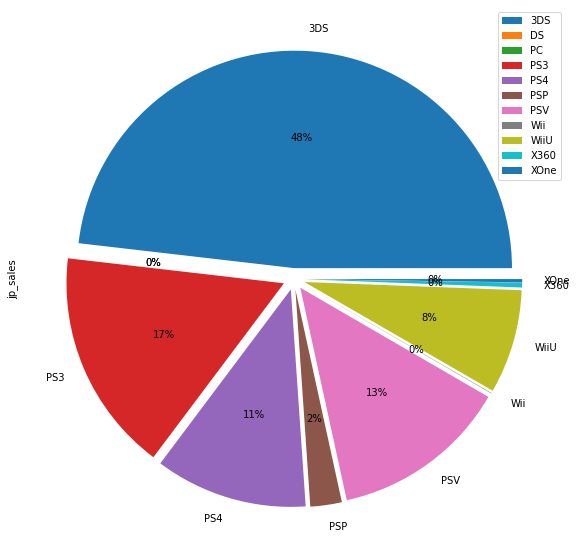

In [238]:
current_df.groupby(['platform']).sum().plot(kind='pie', y='jp_sales', autopct='%1.0f%%',figsize=(25,10),
                                            explode=explode)
plt.show()

### Топ-5 платформ и доля "jp_sales" : 
### 1. 3DS - 48 % 
### 2. PS3 - 17 %
### 3. PSV - 13 %
### 4. PS4 - 11 %
### 5. Wiiu - 8%

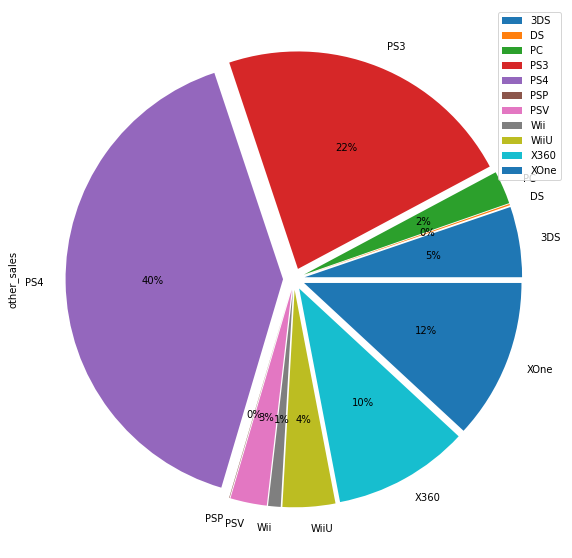

In [152]:
current_df.groupby(['platform']).sum().plot(kind='pie', y='other_sales', autopct='%1.0f%%',figsize=(25,10),
                                            explode=explode)
plt.show()

### Топ-5 платформ и доля "other_sales" : 
### 1. PS4 - 40 % 
### 2. PS3 - 22 %
### 3. XOne - 12 %
### 4. X360 - 10 %
### 5. 3DS - 5%

In [154]:
current_df['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

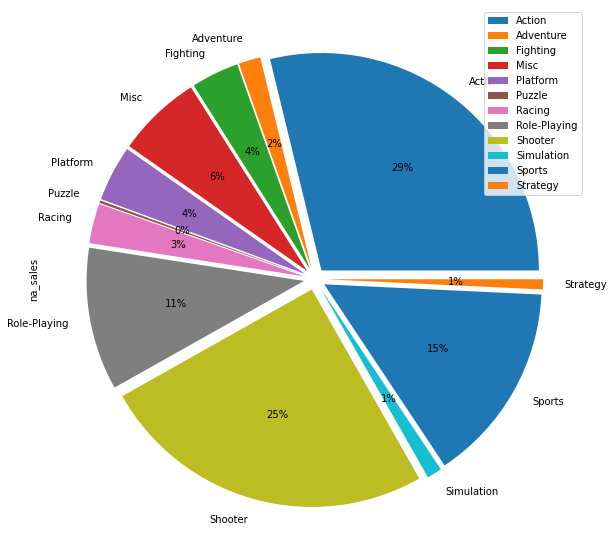

In [155]:
explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
current_df.groupby(['genre']).sum().plot(kind='pie', y='na_sales', autopct='%1.0f%%',figsize=(25,10),
                                            explode=explode)
plt.show()

### Топ-4 жанр и доля "na_sales" : 
### 1. Action - 29 % 
### 2. Shooter - 25 %
### 3. Sports - 15 %
### 4. Role-Playing - 11 %


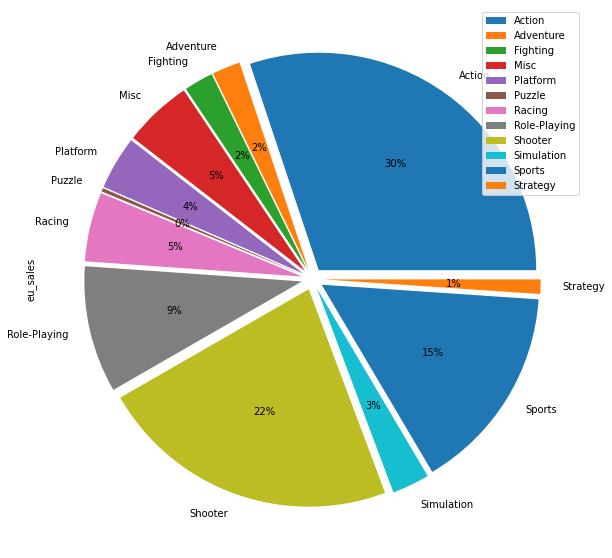

In [156]:
current_df.groupby(['genre']).sum().plot(kind='pie', y='eu_sales', autopct='%1.0f%%',figsize=(25,10),
                                            explode=explode)
plt.show()

### Топ-4 жанр и доля "eu_sales" : 
### 1. Action - 30 % 
### 2. Shooter - 22 %
### 3. Sports - 15 %
### 4. Role-Playing - 9 %

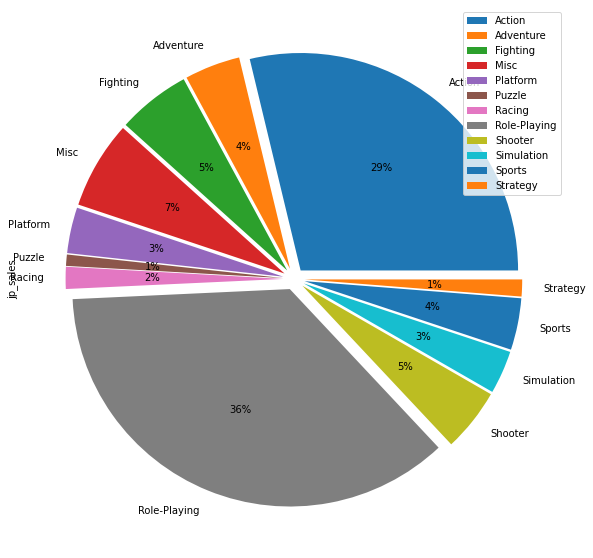

In [157]:
current_df.groupby(['genre']).sum().plot(kind='pie', y='jp_sales', autopct='%1.0f%%',figsize=(25,10),
                                            explode=explode)
plt.show()

### Топ-4 жанр и доля "jp_sales" : 
### 1. Role-Playing - 36 % 
### 2. Action - 29 %
### 3. Misc - 7 %
### 4. Shooter- 5 %
### 5. Fighting - 5 %

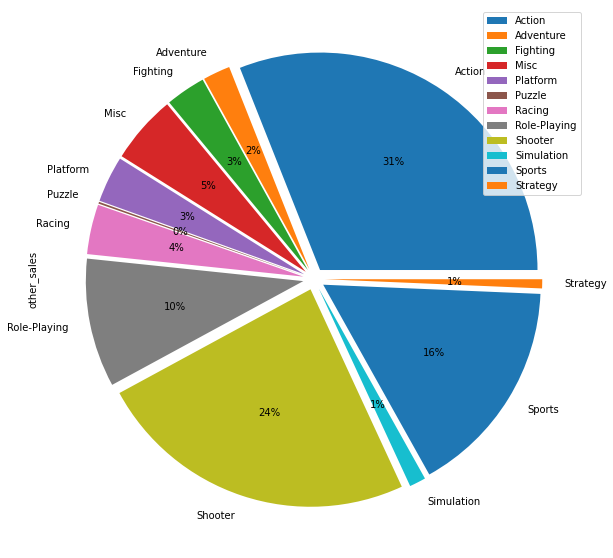

In [158]:
current_df.groupby(['genre']).sum().plot(kind='pie', y='other_sales', autopct='%1.0f%%',figsize=(25,10),
                                            explode=explode)
plt.show()

### Топ-4 жанр и доля "other_sales" : 
### 1. Action - 31 % 
### 2. Shooter - 24 %
### 3. Sports - 16 %
### 4. Role-Playing - 10 %

In [160]:
na_rating = pd.pivot_table(current_df, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_rating

,na_sales
rating,
M,165.21
NA,89.42
E,79.05
E10+,54.24
T,49.79


### Важно помнить, что "NA" не может рассматриваться, поскольку он заполнен для обработки нулевых значений.

In [239]:
eu_rating = pd.pivot_table(current_df, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_rating  

,eu_sales
rating,
M,145.32
E,83.36
NA,78.91
E10+,42.69
T,41.95


In [240]:
jp_rating = pd.pivot_table(current_df, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_rating

,jp_sales
rating,
NA,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


In [241]:
other_rating = pd.pivot_table(current_df, index='rating', values='other_sales',
                                        aggfunc='sum').sort_values('other_sales', ascending=False)
other_rating

,other_sales
rating,
M,47.04
NA,23.46
E,22.61
T,14.29
E10+,12.57


In [242]:
XOne = df.loc[df['platform']=='XOne']['user_score'] 
PC = df.loc[df['platform']=='PC']['user_score']
print("Mean of XOne: ",XOne.median())
print("Mean of PC:", PC.median())   

Mean of XOne:  6.8
Mean of PC: 7.5


In [243]:
print("Variance of XOne: ",np.var(df.loc[df['platform']=='XOne']['user_score'])) 
print("Variance of PC: ",np.var(df.loc[df['platform']=='PC']['user_score']))   

Variance of XOne:  1.4124824206264672
Variance of PC:  1.8822754187644315


In [244]:
alpha = 0.05
result = st.ttest_ind(XOne,PC,equal_var=False)
print("P Value:",result.pvalue)
if (result.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject null hypothesis")


P Value: 3.834424273971492e-10
We reject the null hypothesis


### Мы отвергаем нулевую гипотезу как "Pvalue< alpha". Альтернативная гипотеза : средние оценки пользователей платформ Xbox One и PC отличаются друг от друга.

In [245]:
action = df.loc[df['genre']=='Action']['user_score']
sports = df.loc[df['genre']=='Sports']['user_score']
print("Mean of Genre Action: ",action.mean())
print("Mean of Genre Sports: ",sports.mean())



Mean of Genre Action:  7.253429830081745
Mean of Genre Sports:  7.3186352941176445


In [246]:
print("Variance of Action: ",np.var(df.loc[df['genre']=='Action']['user_score'])) 
print("Variance of Sports: ",np.var(df.loc[df['genre']=='Sports']['user_score']))   

Variance of Action:  1.2709400927791494
Variance of Sports:  1.5804621375778507


In [247]:
alpha = 0.05
result = st.ttest_ind(action,sports,equal_var=False)
print("P Value:",result.pvalue)
if (result.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject null hypothesis")

P Value: 0.05395704924199178
We cannot reject null hypothesis


### Мы не можем отвергнуть нулевую гипотезу.Таким образом, остается верным, что средний "user_score" жанров "_Action" и "Sports" одинаковы.

## Спасибо, что уделили мне время. Хорошего дня!